In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [10]:
import pandas as pd

data = pd.read_csv(r"C:\Users\user\Documents\LoanProject\loan_data.csv")
data.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data = data.dropna()
data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])


In [14]:
X = data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History', 'Education']]
y = data['Loan_Status']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [17]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.7708333333333334


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


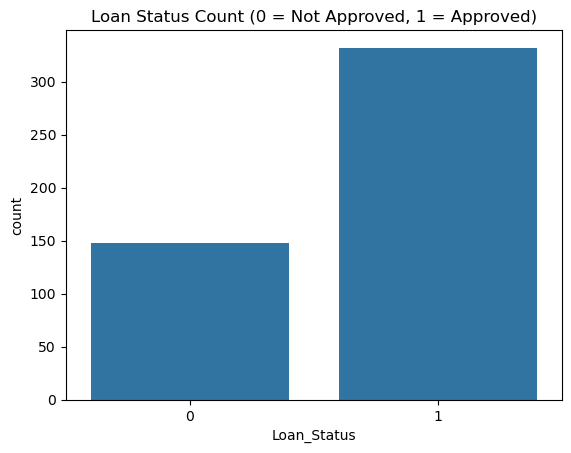

In [19]:
sns.countplot(x='Loan_Status', data=data)
plt.title("Loan Status Count (0 = Not Approved, 1 = Approved)")
plt.show()


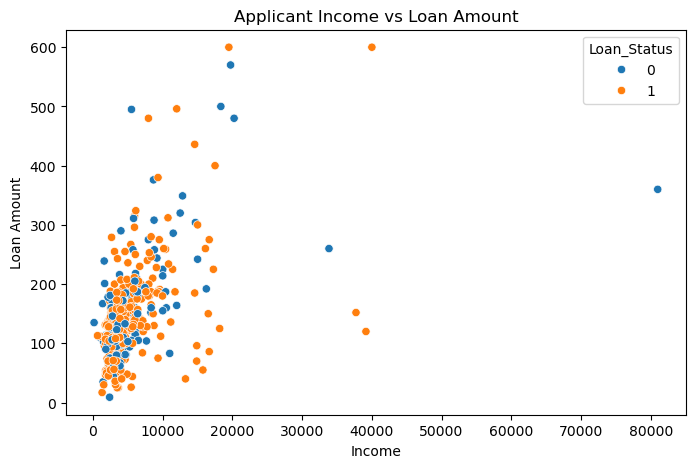

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=data)
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.show()


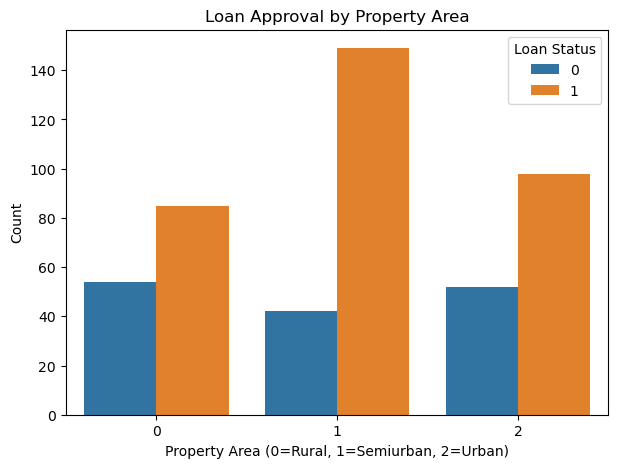

In [21]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)
plt.title("Loan Approval by Property Area")
plt.xlabel("Property Area (0=Rural, 1=Semiurban, 2=Urban)")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


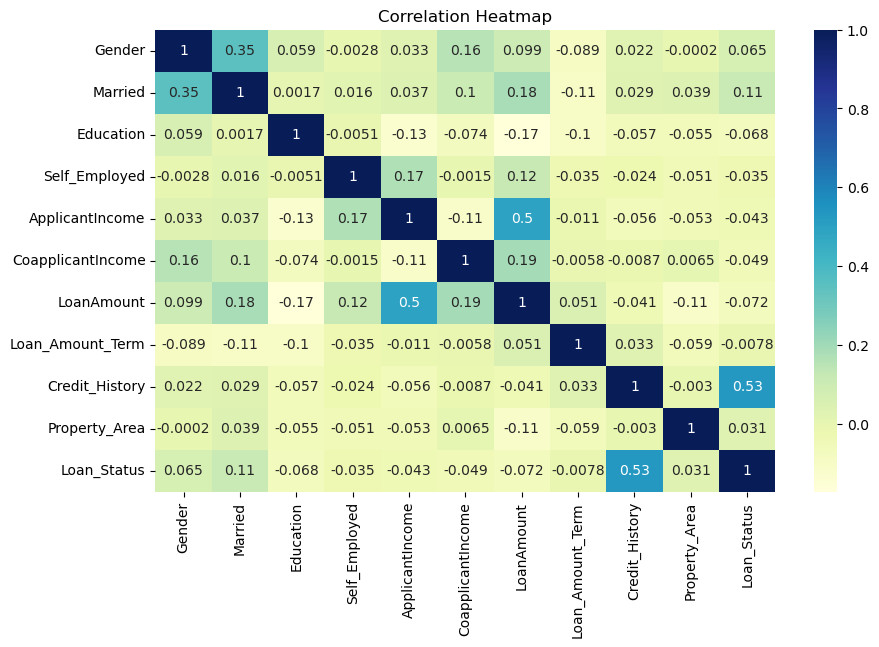

In [23]:
# Keep only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Now create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()
